In [7]:
import pandas as pd

df = pd.read_csv('housing.csv')
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25.0,1665.0,374.0,845.0,330.0,1.5603,78100.0,INLAND
20636,-121.21,39.49,18.0,697.0,150.0,356.0,114.0,2.5568,77100.0,INLAND
20637,-121.22,39.43,17.0,2254.0,485.0,1007.0,433.0,1.7000,92300.0,INLAND
20638,-121.32,39.43,18.0,1860.0,409.0,741.0,349.0,1.8672,84700.0,INLAND


数据形状: (20640, 10)

缺失值情况:
longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

===== 数据样本 =====
训练集大小: 16512
验证集大小: 4128

前3个样本:
       longitude  latitude  housing_median_age  total_rooms  total_bedrooms  \
12767  -0.927897  1.395051            0.428424    -0.693369       -0.669827   
15069   1.299058 -1.335806            0.507991    -0.699302       -0.717370   
1558   -1.188128  1.015635           -1.640316     3.966698        2.660520   

       population  households  median_income  median_house_value  \
12767   -0.744943   -0.672530      -0.888370             84400.0   
15069   -0.663461   -0.664693      -0.469280            136400.0   
1558     2.354910    2.754706       2.069073            369200.0   

       ocean_proximity  rooms_per_household  bedrooms_per_ro

epoch,train_loss,valid_loss,_rmse,mae,r2_score,time
0,57080459264.000000,56416387072.000000,237521.343750,207459.343750,-3.214445,00:02
1,53566595072.000000,56237137920.000000,237143.703125,207202.140625,-3.201055,00:02
2,55754059776.000000,55209005056.000000,234965.968750,205558.281250,-3.124250,00:02
3,52616232960.000000,52563394560.000000,229267.093750,201171.703125,-2.926617,00:02
4,47084720128.000000,47405744128.000000,217728.609375,192396.109375,-2.541327,00:02
5,39851286528.000000,40672272384.000000,201673.671875,179521.437500,-2.038320,00:02
6,31450515456.000000,32351338496.000000,179864.781250,161017.187500,-1.416726,00:02
7,23208046592.000000,24626409472.000000,156928.046875,139502.343750,-0.839654,00:02
8,16369770496.000000,18848114688.000000,137288.437500,120667.789062,-0.408001,00:02
9,12424930304.000000,14773423104.000000,121545.976562,105036.054688,-0.103612,00:02



===== 训练曲线 =====


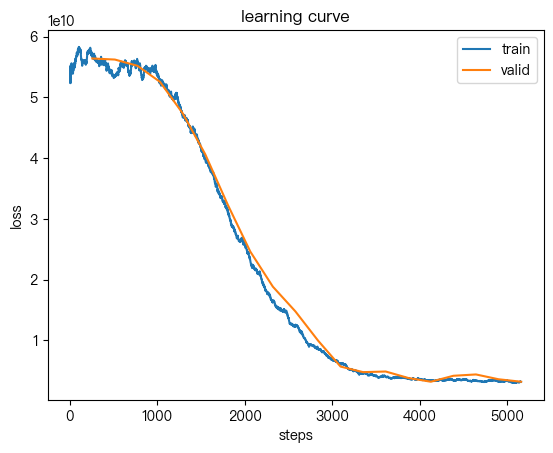


===== 模型评估 =====


均方根误差 (RMSE): $56,587.43
平均绝对误差 (MAE): $36,883.84
R² 分数: 0.7608
平均绝对百分比误差 (MAPE): 18.76%
平均房价: $207,469.80
RMSE占平均房价比例: 27.28%

===== 模型健康检查 =====
预测值范围: $29,286.35 ~ $525,870.31
实际值范围: $22,500.00 ~ $500,001.00
预测值均值: $196,192.50
实际值均值: $207,469.80

✅ 模型训练正常

===== 预测示例 =====


       实际房价           预测房价            误差  误差率(%)
0  452600.0  416724.562500  35875.437500    7.93
1  358500.0  438262.000000 -79762.000000   22.25
2  352100.0  413873.562500 -61773.562500   17.54
3  341300.0  327815.781250  13484.218750    3.95
4  342200.0  256058.546875  86141.453125   25.17
5  269700.0  281656.125000 -11956.125000    4.43
6  299200.0  267235.156250  31964.843750   10.68
7  241400.0  290550.250000 -49150.250000   20.36
8  226700.0  171808.890625  54891.109375   24.21
9  261100.0  291688.718750 -30588.718750   11.72

===== 生成可视化图表 =====


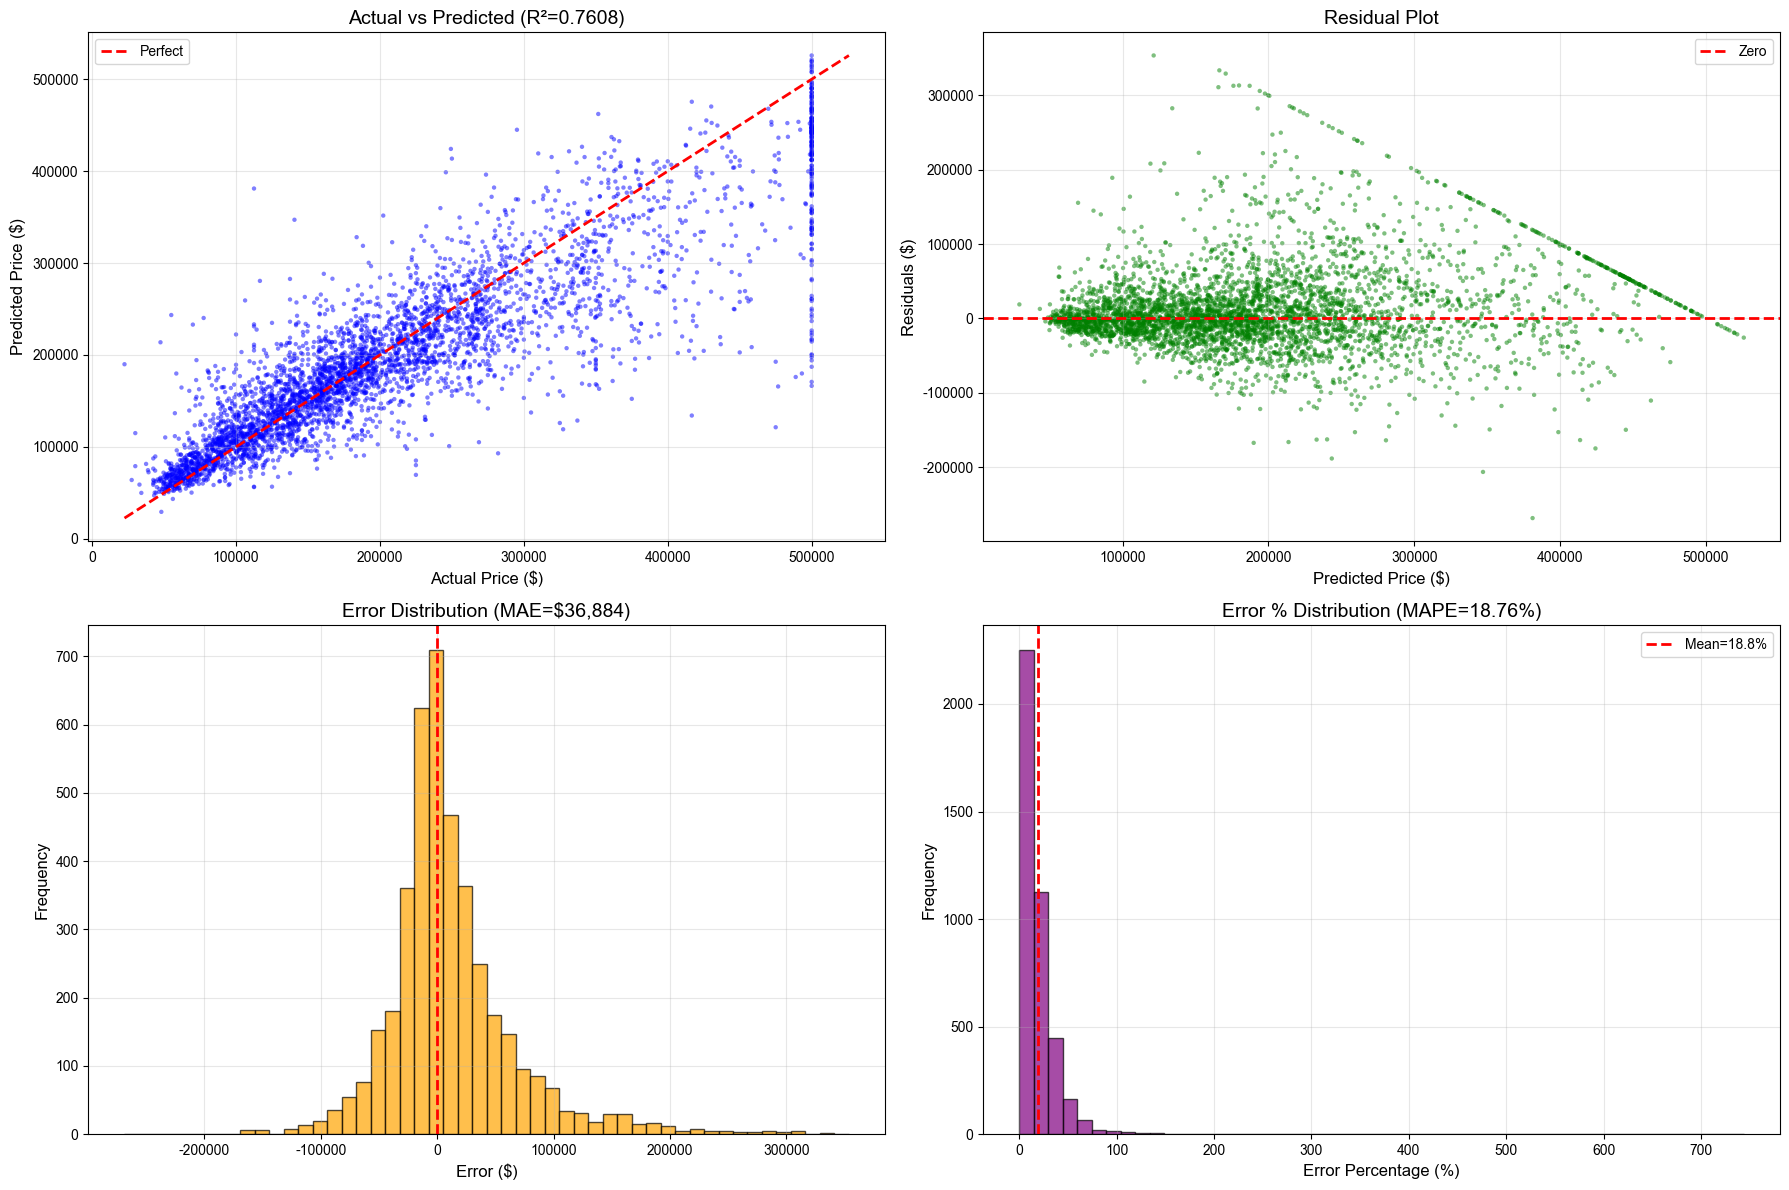


✓ Model saved as 'housing_model.pkl'

                 MODEL PERFORMANCE SUMMARY                  
Training samples: 16,512
Validation samples: 4,128
Features: 14
  - Categorical: 3 ['ocean_proximity', 'total_bedrooms_na', 'bedrooms_per_room_na']
  - Continuous: 11
------------------------------------------------------------
Performance Metrics:
  RMSE: $56,587.43
  MAE: $36,883.84
  R² Score: 0.7608
  MAPE: 18.76%
  RMSE/Mean Price: 27.28%
------------------------------------------------------------
Model Configuration:
  Architecture: [200, 100]
  Dropout: [0.2, 0.1]
  Learning Rate: 0.912011
  Epochs Trained: 1

✅ Training Complete!


In [46]:
# 1. 导入必要的库
from fastai.tabular.all import *
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# 设置随机种子
set_seed(42)

# 2. 读取数据
df = pd.read_csv('housing.csv')
print("数据形状:", df.shape)
print("\n缺失值情况:")
print(df.isnull().sum())

# 创建数据副本
df = df.copy()

# 3. 准备 fastai 的 TabularDataLoaders
dep_var = 'median_house_value'

cat_names = ['ocean_proximity']

# 添加这些派生特征可显著提升性能
df['rooms_per_household'] = df['total_rooms'] / df['households']
df['bedrooms_per_room'] = df['total_bedrooms'] / df['total_rooms']
df['population_per_household'] = df['population'] / df['households']


cont_names = ['longitude', 'latitude', 'housing_median_age', 
              'total_rooms', 'total_bedrooms', 'population', 
              'households', 'median_income',
              'rooms_per_household', 'bedrooms_per_room', 
              'population_per_household']  # 新增3个特征

# ✅ 正确的预处理配置
procs = [Categorify, FillMissing, Normalize]

# 创建训练/验证集划分
splits = RandomSplitter(valid_pct=0.2, seed=42)(range_of(df))

# 创建 TabularPandas 对象
to = TabularPandas(
    df, 
    procs=procs,
    cat_names=cat_names,
    cont_names=cont_names,
    y_names=dep_var,
    y_block=RegressionBlock(),
    splits=splits
)

# 创建数据加载器
dls = to.dataloaders(bs=64)

# 4. 查看数据样本
print("\n===== 数据样本 =====")
print("训练集大小:", len(to.train))
print("验证集大小:", len(to.valid))
print("\n前3个样本:")
print(to.train.items.head(3))

# 5. 创建学习器（✅ 正确配置）
print("\n===== 创建模型 =====")

# 使用适中的正则化配置
config = tabular_config(
    ps=[0.3, 0.2, 0.1],        # ✅ 降低 Dropout，之前0.5太高
    embed_p=0.04,         # ✅ 降低 embedding dropout
    use_bn=True,
    bn_final=False,
)

learn = tabular_learner(
    dls, 
    layers=[300, 200, 100],    # ✅ 恢复较大的网络容量
    config=config,
    metrics=[rmse, mae, R2Score()],
    loss_func=MSELossFlat()
)

print("模型结构:")
print(learn.model)


# 7. 训练模型（✅ 改进版本）
print("\n===== 开始训练 =====")

learn.fit_one_cycle(20, 0.02, pct_start=0.3, wd=0.01) 


# 8. 查看训练曲线
print("\n===== 训练曲线 =====")
try:
    learn.recorder.plot_loss()
    # plt.savefig('training_loss.png', dpi=150, bbox_inches='tight')
    plt.show()
except Exception as e:
    print(f"绘图错误: {e}")

# 9. 模型评估
print("\n===== 模型评估 =====")

# 获取验证集预测
preds, targets = learn.get_preds()

# 转换为 numpy 数组
preds_np = preds.numpy().flatten()
targets_np = targets.numpy().flatten()

# 计算评估指标
mse = mean_squared_error(targets_np, preds_np)
rmse_score = np.sqrt(mse)
mae_score = mean_absolute_error(targets_np, preds_np)
r2 = r2_score(targets_np, preds_np)

# 安全计算 MAPE（避免除以0）
mape = (np.abs(targets_np - preds_np) / np.maximum(targets_np, 1)).mean() * 100

print(f"均方根误差 (RMSE): ${rmse_score:,.2f}")
print(f"平均绝对误差 (MAE): ${mae_score:,.2f}")
print(f"R² 分数: {r2:.4f}")
print(f"平均绝对百分比误差 (MAPE): {mape:.2f}%")
print(f"平均房价: ${targets_np.mean():,.2f}")
print(f"RMSE占平均房价比例: {(rmse_score/targets_np.mean()*100):.2f}%")

# ✅ 添加模型健康检查
print("\n===== 模型健康检查 =====")
print(f"预测值范围: ${preds_np.min():,.2f} ~ ${preds_np.max():,.2f}")
print(f"实际值范围: ${targets_np.min():,.2f} ~ ${targets_np.max():,.2f}")
print(f"预测值均值: ${preds_np.mean():,.2f}")
print(f"实际值均值: ${targets_np.mean():,.2f}")

# 检查预测是否合理
if preds_np.max() < 1000:
    print("\n⚠️  警告：预测值过小，模型未正确学习！")
    print("建议：")
    print("1. 检查目标变量是否正确")
    print("2. 尝试提高学习率")
    print("3. 减少正则化强度")
elif r2 < 0:
    print("\n⚠️  警告：R²为负，模型表现差于基线！")
elif r2 < 0.5:
    print("\n⚠️  注意：R²较低，模型性能一般")
else:
    print("\n✅ 模型训练正常")

# 10. 预测示例
print("\n===== 预测示例 =====")

# 选择前10个样本进行预测
row = df.iloc[:10]
test_dl = dls.test_dl(row)
test_preds = learn.get_preds(dl=test_dl)[0]

comparison = pd.DataFrame({
    '实际房价': row[dep_var].values,
    '预测房价': test_preds.numpy().flatten(),
})
comparison['误差'] = comparison['实际房价'] - comparison['预测房价']
comparison['误差率(%)'] = (abs(comparison['误差']) / comparison['实际房价'] * 100).round(2)
print(comparison.to_string())

# 11. 可视化结果
print("\n===== 生成可视化图表 =====")

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS', 'SimHei', 'DejaVu Sans']
plt.rcParams['axes.unicode_minus'] = False

fig, axes = plt.subplots(2, 2, figsize=(18, 12))

# 1) 实际值 vs 预测值
axes[0, 0].scatter(targets_np, preds_np, alpha=0.5, s=10, c='blue', edgecolors='none')
min_val = min(targets_np.min(), preds_np.min())
max_val = max(targets_np.max(), preds_np.max())
axes[0, 0].plot([min_val, max_val], [min_val, max_val], 'r--', lw=2, label='Perfect')
axes[0, 0].set_xlabel('Actual Price ($)', fontsize=12)
axes[0, 0].set_ylabel('Predicted Price ($)', fontsize=12)
axes[0, 0].set_title(f'Actual vs Predicted (R²={r2:.4f})', fontsize=14, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(True, alpha=0.3)

# 2) 残差图
residuals = targets_np - preds_np
axes[0, 1].scatter(preds_np, residuals, alpha=0.5, s=10, c='green', edgecolors='none')
axes[0, 1].axhline(y=0, color='r', linestyle='--', lw=2, label='Zero')
axes[0, 1].set_xlabel('Predicted Price ($)', fontsize=12)
axes[0, 1].set_ylabel('Residuals ($)', fontsize=12)
axes[0, 1].set_title('Residual Plot', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# 3) 误差分布
axes[1, 0].hist(residuals, bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[1, 0].axvline(x=0, color='r', linestyle='--', lw=2)
axes[1, 0].set_xlabel('Error ($)', fontsize=12)
axes[1, 0].set_ylabel('Frequency', fontsize=12)
axes[1, 0].set_title(f'Error Distribution (MAE=${mae_score:,.0f})', fontsize=14, fontweight='bold')
axes[1, 0].grid(True, alpha=0.3)


# 5) 误差百分比分布
abs_error_pct = np.abs(residuals) / np.maximum(targets_np, 1) * 100
axes[1, 1].hist(abs_error_pct, bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[1, 1].axvline(x=abs_error_pct.mean(), color='r', linestyle='--', lw=2,
                   label=f'Mean={abs_error_pct.mean():.1f}%')
axes[1, 1].set_xlabel('Error Percentage (%)', fontsize=12)
axes[1, 1].set_ylabel('Frequency', fontsize=12)
axes[1, 1].set_title(f'Error % Distribution (MAPE={mape:.2f}%)', fontsize=14, fontweight='bold')
axes[1, 1].legend()
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 12. 保存模型
learn.export('housing_model.pkl')
print("\n✓ Model saved as 'housing_model.pkl'")

# 13. 性能摘要
print("\n" + "="*60)
print("MODEL PERFORMANCE SUMMARY".center(60))
print("="*60)
print(f"Training samples: {len(to.train):,}")
print(f"Validation samples: {len(to.valid):,}")
print(f"Features: {len(cat_names) + len(cont_names)}")
print(f"  - Categorical: {len(cat_names)} {cat_names}")
print(f"  - Continuous: {len(cont_names)}")
print("-"*60)
print("Performance Metrics:")
print(f"  RMSE: ${rmse_score:,.2f}")
print(f"  MAE: ${mae_score:,.2f}")
print(f"  R² Score: {r2:.4f}")
print(f"  MAPE: {mape:.2f}%")
print(f"  RMSE/Mean Price: {(rmse_score/targets_np.mean()*100):.2f}%")
print("-"*60)
print("Model Configuration:")
print(f"  Architecture: {[200, 100]}")
print(f"  Dropout: {[0.2, 0.1]}")
print(f"  Learning Rate: {safe_lr:.6f}")
print(f"  Epochs Trained: {len(learn.recorder.values)}")
print("="*60)

print("\n✅ Training Complete!")